In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
np.random.seed(10)

In [3]:
X = pd.read_excel("X.xlsx")

In [4]:
fa_stats_v3 = pd.read_excel("../spring21_data/fa_stats_v3.xlsx")
fa_stats_v3 = fa_stats_v3 .sample(frac=1).reset_index(drop=True) ## make sure to shuffle the rows otherwise the cross validation will be scuffed

In [5]:
fa_stats_v3 = fa_stats_v3[fa_stats_v3["minutes_played"] >= 15]
fa_stats_v3 = fa_stats_v3[fa_stats_v3["Games"] >= 30]
fa_stats_v3 = fa_stats_v3[fa_stats_v3["value_over_replacement_player"] >= 0]

In [6]:
df = fa_stats_v3.select_dtypes(exclude=['object'])

In [7]:
df.drop(columns=["Unnamed: 0", "Minutes", "salary", "clean_season", "age", "end season_y", "season_end"], inplace=True)

C:\Users\Rishab\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
df.columns

Index(['WS', 'Games', 'O-LEBRON', 'D-LEBRON', 'Wins Added', 'MPG', 'ORPM',
       'DRPM', 'poss', 'raptor_offense', 'raptor_defense', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'pace_impact', 'LA_RAPM__Def', 'LA_RAPM__Off',
       'RA_EFG__Def', 'RA_EFG__Off', 'RA_FTR__Def', 'RA_FTR__Off',
       'RA_ORBD__Def', 'RA_ORBD__Off', 'RA_TOV__Def', 'RA_TOV__Off',
       'RAPM__Def', 'RAPM__Off', 'games_played', 'games_started',
       'minutes_played', 'made_field_goals', 'attempted_field_goals',
       'made_three_point_field_goals', 'attempted_three_point_field_goals',
       'made_free_throws', 'attempted_free_throws', 'offensive_rebounds',
       'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_perce

In [9]:
## THE FINAL DATASET
X_v3 = df.drop(columns=["cap_space_usage"])
y_v3 = df["cap_space_usage"]
X_v3.to_excel("X_v3.xlsx")
y_v3.to_excel("y_v3.xlsx")

In [10]:
X = X_v3
y = y_v3

In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
select = SelectKBest(f_regression, k=20)

best_features = select.fit_transform(X, y)
feature_scores = pd.concat([pd.Series(X.columns), pd.Series(select.scores_)], axis=1)
feature_scores.columns = ["features", "score"]
features = list(feature_scores.sort_values(by=["score"], ascending=False).head(65)['features'])

X = X[features]
print(X.columns.values)

['WS' 'points' 'Wins Added' 'made_field_goals' 'MPG' 'win_shares'
 'value_over_replacement_player' 'minutes_played' 'poss'
 'attempted_field_goals' 'war_total' 'offensive_box_plus_minus'
 'offensive_win_shares' 'made_free_throws' 'war_reg_season'
 'attempted_free_throws' 'box_plus_minus' 'predator_offense' 'O-LEBRON'
 'raptor_offense' 'player_efficiency_rating' 'defensive_win_shares'
 'war_playoffs' 'games_started' 'win_shares_per_48_minutes' 'turnovers'
 'ORPM' 'RAPM__Off' 'defensive_rebounds' 'usage_percentage' 'RA_EFG__Off'
 'LA_RAPM__Off' 'steals' 'assists' 'made_three_point_field_goals'
 'attempted_three_point_field_goals' 'free_throw_attempt_rate' 'blocks'
 'assist_percentage' 'pace_impact' 'RA_FTR__Off'
 'true_shooting_percentage' 'personal_fouls' 'RA_FTR__Def' 'LA_RAPM__Def'
 'RAPM__Def' 'D-LEBRON' 'RA_EFG__Def' 'games_played' 'offensive_rebounds'
 'Games' 'defensive_rebound_percentage' 'RA_TOV__Off' 'predator_defense'
 'defensive_box_plus_minus' 'total_rebound_percentage'
 'th

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import Normalizer

In [13]:
from sklearn.model_selection import cross_val_score
def performance(model):
    etr = make_pipeline(Normalizer(), model)
    scores = cross_val_score(etr, X, y, cv=5, scoring="explained_variance")
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    return scores

In [14]:
performance(ExtraTreesRegressor())

0.67 accuracy with a standard deviation of 0.06


array([0.7032647 , 0.67915286, 0.74614106, 0.58196236, 0.62553742])

In [15]:
performance(ExtraTreesRegressor(max_depth=None, n_estimators=200, min_samples_split=3, min_samples_leaf=2, random_state=42))

0.67 accuracy with a standard deviation of 0.06


array([0.69574921, 0.67810043, 0.74348739, 0.57984058, 0.63631581])

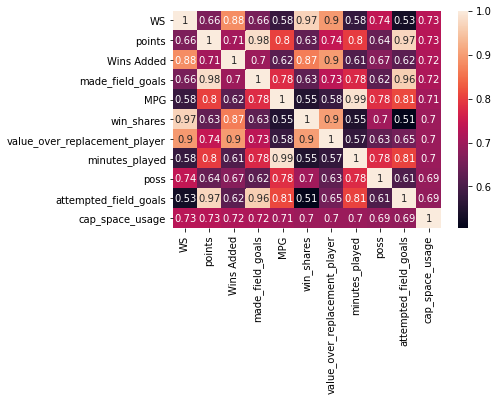

In [18]:
import seaborn as sns
sns.heatmap(pd.concat([X[features[0:10]], y], axis=1).corr(), annot=True)